## STAT-650_733000826

# Problem - 1

1. Import Python packages that may be useful for examining a given dataset, and set plot style as "$\texttt{searborn-darkgrid}$".
2. Import $\texttt{tips.csv}$ dataset and print the size and the first five observations of the dataset
3. Use the parameter **total_bill** to compute the following summary statistics
    - Mean
    - Median
    - Standard Deviation
    - Range
    - The Interquartile Range?
    - Skewness
    
    
 4. Also find how many outlier observations are there?


[$6 + 3 + (3\times 6) + 3 = 30$ marks]

## Solution Problem 1:


In [1]:
# 1. Importing Packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import statsmodels.api as sm
import pingouin as pg

sns.set_style("darkgrid", rc=None)

# 2. Importing tips.csv dataset and printing the size and the first five observations of the dataset
df = pd.read_csv('tips.csv', sep=',')
print(df.shape)
df.head()

ModuleNotFoundError: No module named 'pingouin'

The size of the dataframe is (244, 7). <br>
The first five observations of the dataset is printed above.

In [125]:
# 3. Summary Statistics using parameter total_bill
df.agg( 
    {
          "total_bill": ["mean", "median", "std", "min", "max", "skew"] 
          
    } 
)



,total_bill
mean,19.785943
median,17.795000
std,8.902412
min,3.070000
max,50.810000
skew,1.133213


Therefore as per the above output, <br>
mean = 19.79 approx <br>
median = 17.80 approx <br>
standard deviation = 8.90 approx <br>
range = [min = 3.07, max = 50.81], range value: max - min = 47.74 <br>
skew = 1.13 approx (positive, right skewed) <br>

In [112]:
# Calculating interquartile range
q75, q25 = np.percentile(df["total_bill"], [75 ,25])
iqr = q75 - q25
print(iqr)

10.779999999999998


Interquartile range = 10.78 approx

In [114]:
# 4. Calculating number of Outliers in total_bills
# LIF, UIF : Lower and upper fences

LIF = q25 - 1.5*iqr
UIF = q75 + 1.5*iqr
Outliers_count = (df["total_bill"] < LIF).sum() + (df["total_bill"] > UIF).sum()
print(Outliers_count)


9


# Problem - 2 
1. Describe **total_bill** based on the summary statistics \
    (Hint: Here we are interested in the shape of the distribution. You may consider the following options:
    - Examine histogram and check size/length of tails: (longer left tail $\implies$ left-skewed, longer right tail $\implies$ right-skewed)
    - Use skewness (negative=left-skewed, positive=right-skewed)
    - Compare the relative position of median and mean (mean<median $\implies$ left-skewed, mean>median $\implies$ right-skewed))
2. Plot the distribution of the parameter **total_bill** and justify your answer in part 1.

[$10 + 10 = 20$ marks]

## Solution Problem 2:


1. Description of total_bill based on summary statistics:

- As per the summary statistics calculated in problem 1, mean (19.79 approx) is greater than median (17.80 approx). This implies that the plot is right-skewed. 
- As per the histogram plotted below, it has a longer right tail. Hence, it further confirms the above results. 

2. Plotting of total_bill and justification of plot using ressults from part 1:

- From summary statistics data from problem 1, skew = 1.13 (positive). Therefore, right-skewed. This can be confirmed from the histogram plotted below for count vs total_bill, which has a longer right tail.
- It implies all the nine outliers calculated in problem one lies on the right side of the plot and is right-skewed. Therefore, the plot aligns with the results and observations from the summary statistics discussed above.


Text(0.5, 1.0, 'Count vs total_bill plot for tips dataset')

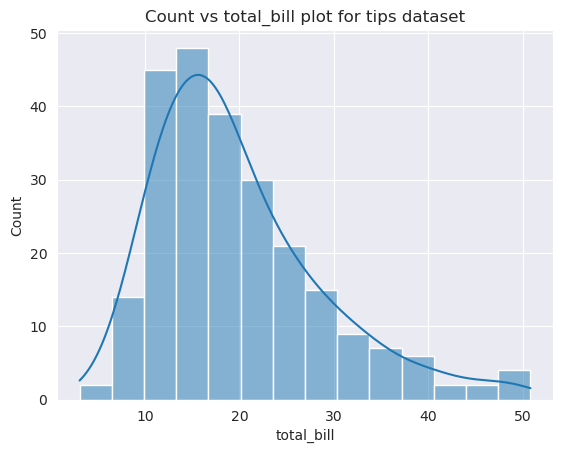

In [160]:
# Plotting Histogram and checking size/length of tails:
sns.histplot(df.total_bill, kde=True).set_title('Count vs total_bill plot for tips dataset')


# Problem - 3 : Data filtering
1. What is the average number of bills per day?
2. How many days had more that 60 bills?
3. What is the average percentage tip for male servers (compute by using operations: $\texttt{query}$, $\texttt{indexer}$ and $\texttt{groupby}$ )?\
Hint:\
• Method $\texttt{query}$ uses a string to describe the condition used in the filter.
        – df.query("sex=='Male'") performs the filtering of the required rows.
        – df.query("sex=='Male'")['percentage_tip'] performs the filtering of rows and then selects the required column.
        – df.query("sex=='Male'")['percentage_tip'].mean() performs … and then calculates the required mean.
• Method $\texttt{loc}$ uses python expression to describe the condition used in the filter.
        – loc is an indexer so even though it is a function it uses [] and not ()
• Method $\texttt{groupby}$ divides the dataset into groups
        – df.groupby("sex") group data based on specified column(s)
        – df.groupby("sex")['percentage_tip'] select column percentage_tip in all groups
        – df.groupby("sex")['percentage_tip'].mean() apply required aggregate function
4. Which group size gives the lowest percentage tip on average?
5. What is the max percentage tip for female servers over the weekend (Sat or Sun)? Solve by using operations $\texttt{query}$ and $\texttt{loc}$.
6. Picking a bill at random, what is the probability that the server is female? 
(Hint: Filter using $\texttt{query/loc}$ and compute probability)
7. Picking a bill at random, what is the probability that the server is female given that the day was Sunday
8. Which meal time has the highest mean tips?
9. True or False: “**Despite female servers having higher average percentage tips, it is male servers who earn the highest percentage tips**” 

    This sentence has two claims:
        • “female servers have higher average percentage tips”
        • “male servers earn the highest percentage tips”
    you must verify both.

10. Which is the busiest day (in terms of the number of meals served)?


[$5\times 10 = 50$ marks]

# Solution Problem 3:


In [163]:
# 1. Average number of bills per day
print("Question 1 ans = \n", df.groupby("day").agg(total_bill_mean=("total_bill", "mean")))

# 2. Number of days having more than 60 bills
cnt_df = df.groupby("day").agg(count=("total_bill", "count"))
print("Question 2 ans =", len(cnt_df.query('count > 60')))

# 3. Average percentage tip for male srvers
df["percentage_tip"] = df["tip"]/df["total_bill"]*100
print("Question 3 ans =", df.query("sex=='Male'")['percentage_tip'].mean())
print("Question 3 ans =", df.loc[df.sex=="Male"]['percentage_tip'].mean())
print("Question 3 ans =", df.groupby("sex")['percentage_tip'].mean()["Male"])

# 4. Group size with the lowest percentage tip on average
grp_pct_df = df.groupby("size").agg(percentage_tip_mean=("percentage_tip","mean"))
print("Question 4 ans =", grp_pct_df["percentage_tip_mean"].idxmin())

# 5. Max percentage tip for female servers over the weekend (Sat or Sun)
fml_wknd_df = df.query("sex=='Female' and (day=='Sat' or day=='Sun')")
print("Question 5 ans =", fml_wknd_df["percentage_tip"].max())

fml_wknd_df2 = df.loc[(df['sex']=='Female') & ((df['day']=='Sat') | (df['day']=='Sun'))]
print("Question 5 ans =", fml_wknd_df2["percentage_tip"].max())

# 6. Picking a bill at random, probability that the server is female
print("Question 6 ans =", len(df.query("sex=='Female'"))/len(df))

# 7. Picking a bill at random, probability that the server is female given that the day was Sunday
print("Question 7 ans =", len(df.query("sex=='Female' and day=='Sun'"))/len(df.query("day=='Sun'")))

# 8. Meal time with the highest mean tips
print("Question 8 ans =", df.groupby("time").agg(total_bill_mean=("total_bill", "mean"))["total_bill_mean"].idxmax())

# 9. True or False verification: "Despite female servers having higher average percentage tips, it is male servers who earn the highest percentage tips"
male_has_highest_pct = df.query("sex=='Male'")['percentage_tip'].max() > df.query("sex=='Female'")['percentage_tip'].max()
fml_has_highest_avg_pct = df.query("sex=='Female'")['percentage_tip'].mean() > df.query("sex=='Male'")['percentage_tip'].mean()
print("Question 9 ans =", male_has_highest_pct and fml_has_highest_avg_pct)

# 10. Busiest day in terms of number of meals served
print("Question 10 ans =", df.groupby("day").agg(total_meals_served=("size", "sum"))["total_meals_served"].idxmax())


Question 1 ans = 
       total_bill_mean
day                  
Fri         17.151579
Sat         20.441379
Sun         21.410000
Thur        17.682742
Question 2 ans = 3
Question 3 ans = 15.765054700429744
Question 3 ans = 15.765054700429744
Question 3 ans = 15.765054700429744
Question 4 ans = 5
Question 5 ans = 41.66666666666667
Question 5 ans = 41.66666666666667
Question 6 ans = 0.35655737704918034
Question 7 ans = 0.23684210526315788
Question 8 ans = Dinner
Question 9 ans = True
Question 10 ans = Sat
